<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/AI%EC%A4%91%EA%B8%89/AI%EC%8B%A4%EC%8A%B5_8%EC%9B%9416%EC%9D%BC(%ED%95%A9%EC%84%B1%EA%B3%B11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가져온 이미지 인덱스 :  234
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000,
         0.0000, 0.5333, 0.6784, 0.6471, 0.6157, 0.6196, 0.6863, 0.8118, 0.8627,
         0.8627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.3059,
         0.8510, 0.8157, 0.8549, 0.9020, 0.9098, 0.9608, 1.0000, 0.9608, 0.9137,
         0.8235, 0.8549, 0.3608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1961, 0.7333, 0.8275,
         0.7882, 0.7686, 0.7961, 0.6980, 0.5961, 0.6431, 0.8275, 0.7804, 0.7725,
         0.7098, 0.7529, 0.8431, 0.7608, 0.5216, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2941, 0.7569, 0.7294, 0.7569,
         0.7412, 0.7647, 0.7451, 0.8353, 0.8353, 0.7765, 0.7608, 0.7294, 0.6745,
         0.6431, 0.7725, 0.7569, 0.7

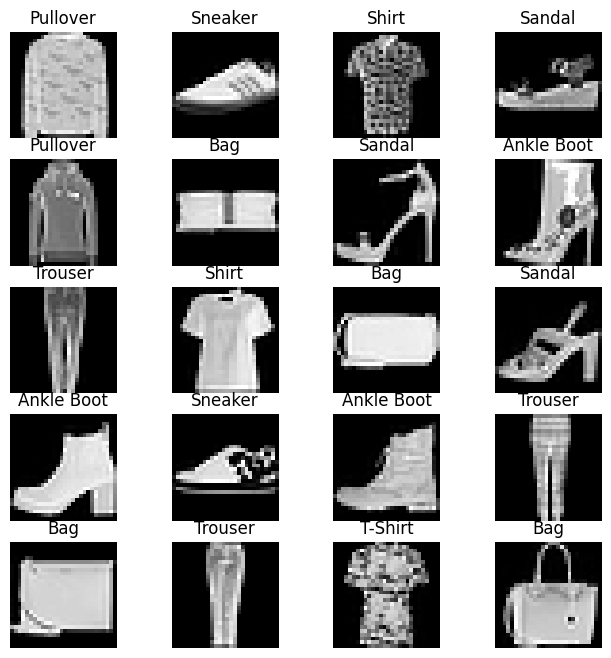

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = torchvision.datasets.FashionMNIST("C:/Users/ukhyu/Desktop/WeAI/fashion_mnist", download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("C:/Users/ukhyu/Desktop/WeAI/fashion_mnist", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=100)

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1) :
    img_xy = np.random.randint(len(train_dataset))
    print("가져온 이미지 인덱스 : ", img_xy)
    img = train_dataset[img_xy][0][0,:,:]
    print(img)
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [24]:
class FashionDNN(nn.Module) :
    def __init__(self) :
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out


learning_rate = 0.001
model = FashionDNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

num_epochs = 20
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs) :
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not(count % 50) :
            total = 0
            correct = 0
            for images, labels in test_dataset:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500) :
            print("Iteration: {}, loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)
Iteration: 500, loss: 0.5689128041267395, Accuracy: 82.9800033569336%
Iteration: 1000, loss: 0.47154849767684937, Accuracy: 84.02999877929688%
Iteration: 1500, loss: 0.38271740078926086, Accuracy: 84.08000183105469%
Iteration: 2000, loss: 0.41741299629211426, Accuracy: 85.5199966430664%
Iteration: 2500, loss: 0.26726603507995605, Accuracy: 85.7699966430664%
Iteration: 3000, loss: 0.33091452717781067, Accuracy: 86.30000305175781%
Iteration: 3500, loss: 0.41271600127220154, Accuracy: 87.37999725341797%
Iteration: 4000, loss: 0.38869860768318176, Accuracy: 85.87999725341797%
Iteration: 4500, loss: 0.266915887594223, Accuracy: 87.02999877929688%
Iteration: 5000, loss: 0.30050790309906006, Accuracy: 86.97000122070312%
Iteration: 5500, loss: 0.225230485200

In [25]:
# FashionCNN 학습데이터
#CNN class
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        print(out.shape)
        print(out.size)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


learning_rate = 0.001
model = FashionCNN()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

num_epochs = 20
count = 0

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs) :
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)

        outputs = model(train)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

        if not(count % 50) :
            total = 0
            correct = 0
            for images, labels in test_dataset:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500) :
            print("Iteration: {}, loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc39ab67f0>


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b75a80>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7cae0>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7f6a0>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b6aca0>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7b970>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7e0c0>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7e200>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b6aca0>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b75a80>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7cf40>
torch.Size([100, 2304])
<built-in method size of Tensor object at 0x7ddc32b7c860>
torch.Size([100, 2304])
<built-in method size of Tensor object

In [16]:
inputs = torch.randn(64,3,244,244)
conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3. padding=1)
outputs = conv(inputs)
layer = nn.Conv2d(1,1,3)

SyntaxError: ignored